# Import

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
import xlrd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils

# Data

In [8]:
satelit_data=(r'..\data\AgERA5_4params_graz.csv')
local_data=(r'..\data\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')
traffic_data=(r'..\data\traffic_data.xlsx')

In [9]:
df_satelit= pd.read_csv(satelit_data,index_col = 0)
df_local = pd.read_csv(local_data,index_col = 0)

In [10]:
df_local.index = pd.to_datetime(df_local.index)
df_local.columns
df_local.Ost_Winddirection

2010-01-01          NaN
2010-01-02          NaN
2010-01-03          NaN
2010-01-04          NaN
2010-01-05          NaN
                ...    
2021-07-03    182.59240
2021-07-04    130.74823
2021-07-05    139.74475
2021-07-06    129.45146
2021-07-07    130.95103
Name: Ost_Winddirection, Length: 4206, dtype: float64

In [11]:
df_satelit.index = pd.to_datetime(df_satelit.index)

In [12]:
df_ulice = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='street', index_col=0)
df_ulice_podaci = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='traffic_data', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\traffic_data.xlsx'

In [13]:
df_ulice_podaci.index = pd.to_datetime(df_ulice_podaci.index)

NameError: name 'df_ulice_podaci' is not defined

In [14]:
df_local=df_local['2018-01-01':'2020-03-15']
df_ulice_podaci=df_ulice_podaci['2018-01-01':'2020-03-15']
df_satelit=df_satelit['2018-01-01':'2020-03-15']

NameError: name 'df_ulice_podaci' is not defined

# Remove nan

In [ ]:
print(df_local.isnull().sum()) 
print(df_satelit.isnull().sum())

print(df_ulice_podaci.isnull().sum())

# popunjavnaje nan vrijednosti s mean za svaku kolonu

df_ulice_podaci = df_ulice_podaci.fillna(df_ulice_podaci.mean())


# Postaje Ost

In [ ]:
Ost = []
Postaje=df_ulice.Reference_station
Udaljenost = df_ulice['Distance to ref']
Postaje=df_ulice.Reference_station
for value,index,udaljenost in zip(Postaje,Postaje.index,Udaljenost):
    if value == 'Ost':
        print(value,index,udaljenost)

In [ ]:
df_ulica_sve_O=df_ulice_podaci[['8010_208','8020_119','8010_213', '8010_214','8041_221']]

In [ ]:
df_local_Windspeed = df_local.Ost_Windspeed

In [ ]:
data_for_model = pd.concat ([df_ulica_sve_O,df_local_Windspeed,df_local_Direction],axis=1)

In [ ]:
data_for_model

In [ ]:
y_corr = df_local[['O_PM10K']]


In [ ]:
df_local_Direction = df_local.Ost_Winddirection

# Korelacija

In [ ]:
data_for_model_corr = pd.concat ([y_corr,df_ulica_sve_O,df_local_Windspeed,df_local_Direction],axis=1)

In [ ]:
data_for_model_corr

In [ ]:
# korelacija 
heatmap = sns.heatmap(data_for_model_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Features Correlating', fontdict={'fontsize':18}, pad=16);        
plt.figure(figsize=(8, 12))


# Model s one hot encoded Direction

In [ ]:
df_local_Direction_ohe = pd.get_dummies(df_local_Direction)

In [ ]:
df_local_Direction_ohe

In [ ]:
df_local_Windspeed = df_local.Ost_Windspeed = df_local.Ost_Windspeed

In [ ]:
df_local_Windspeed_ohe = pd.get_dummies(df_local.Ost_Windspeed)

In [ ]:
data_for_model2 = pd.concat ([df_ulica_sve_O,df_local_Direction_ohe,df_local_Windspeed],axis=1)

In [ ]:
data_for_model2

In [ ]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
training_scores_encodedT = lab_enc.fit_transform(Y_test)

In [ ]:
from sklearn import metricsprint

In [ ]:
Y = df_local['O_PM10K']
X = data_for_model2
X_train = X['2018-01-01':'2019-12-31']
X_test = X['2020-01-03':'2020-03-15']
Y_train = Y['2018-01-01':'2019-12-31']
Y_test = Y['2020-01-03':'2020-03-15']
training_scores_encoded = lab_enc.fit_transform(Y_train)
training_scores_encodedT = lab_enc.fit_transform(Y_test)
model = DecisionTreeClassifier()
model = model.fit(X_train,training_scores_encoded)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(training_scores_encodedT,y_pred)
print(f'mean_absolute_error {mae}')

Ost
R-squared scores: 0.11


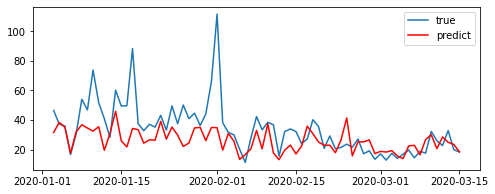

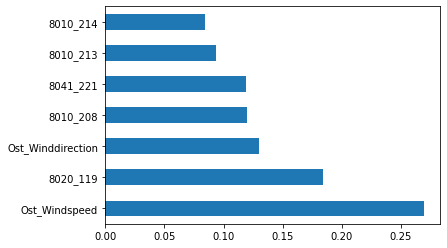

In [109]:
Y = df_local['O_PM10K']
X = data_for_model
X_train = X['2018-01-01':'2019-12-31']
X_test = X['2020-01-03':'2020-03-15']
Y_train = Y['2018-01-01':'2019-12-31']
Y_test = Y['2020-01-03':'2020-03-15']
model = RandomForestRegressor(n_estimators = 400)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('Ost')
print('R-squared scores:', round(r2, 2))        
Y_pred = pd.Series(predictions, index= Y_test.index)
plt.figure(figsize=(8, 3))
plt.plot(Y_test)
plt.plot(Y_pred, 'r')
plt.legend(['true', 'predict'])
plt.show()
feat_importances = pd.Series(model.feature_importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()